In [149]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hivprogression/training_data.csv
/kaggle/input/hivprogression/hivprogression_solution.csv
/kaggle/input/hivprogression/test_data.csv


In [150]:
df = pd.read_csv("/kaggle/input/hivprogression/training_data.csv")
df_test = pd.read_csv("/kaggle/input/hivprogression/test_data.csv")

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PatientID  1000 non-null   int64  
 1   Resp       1000 non-null   int64  
 2   PR Seq     920 non-null    object 
 3   RT Seq     1000 non-null   object 
 4   VL-t0      1000 non-null   float64
 5   CD4-t0     1000 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB


In [152]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692 entries, 0 to 691
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PatientID  692 non-null    int64  
 1   Resp       692 non-null    object 
 2   PR Seq     692 non-null    object 
 3   RT Seq     692 non-null    object 
 4   VL-t0      692 non-null    float64
 5   CD4-t0     692 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 32.6+ KB


<AxesSubplot:>

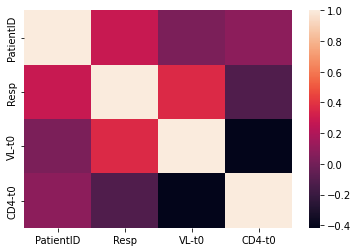

In [153]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr)

In [154]:
df.describe(include = "all")

,PatientID,Resp,PR Seq,RT Seq,VL-t0,CD4-t0
count,1000.000000,1000.000000,920,1000,1000.00000,1000.000000
unique,NaN,NaN,920,1000,NaN,NaN
top,NaN,NaN,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCCCAATAAGGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAGCTAAAGCCAGGAA...,NaN,NaN
freq,NaN,NaN,1,1,NaN,NaN
mean,500.500000,0.206000,NaN,NaN,4.29721,279.638000
std,288.819436,0.404633,NaN,NaN,0.70478,198.186712
min,1.000000,0.000000,NaN,NaN,2.70000,0.000000
25%,250.750000,0.000000,NaN,NaN,3.70000,132.750000
50%,500.500000,0.000000,NaN,NaN,4.30000,249.000000
75%,750.250000,0.000000,NaN,NaN,4.80000,383.250000


In [155]:
df_test.describe(include = "all")

,PatientID,Resp,PR Seq,RT Seq,VL-t0,CD4-t0
count,692.000000,692,692,692,692.000000,692.000000
unique,NaN,1,690,692,NaN,NaN
top,NaN,H,CCTCAAATCACTCTTTGGCAACGACCCATCGTCACAATAAAGATAG...,CCTATTAGTCCTATTGAAACTGTACCAGTRAAATTAAAGCCAGGAA...,NaN,NaN
freq,NaN,692,2,1,NaN,NaN
mean,346.500000,NaN,NaN,NaN,4.495087,253.803468
std,199.907479,NaN,NaN,NaN,0.725690,192.529485
min,1.000000,NaN,NaN,NaN,2.600000,0.000000
25%,173.750000,NaN,NaN,NaN,4.000000,90.000000
50%,346.500000,NaN,NaN,NaN,4.500000,230.500000
75%,519.250000,NaN,NaN,NaN,5.025000,373.000000


In [156]:
print("PR Seq: ",df["PR Seq"].nunique())
print("RT Seq: ",df["RT Seq"].nunique())

PR Seq:  920
RT Seq:  1000


In [157]:
dataset = df[["VL-t0","CD4-t0","Resp"]]
dataset

,VL-t0,CD4-t0,Resp
0,4.30,145,0
1,3.60,224,0
2,3.20,1017,0
3,5.70,206,0
4,3.50,572,0
...,...,...,...
995,3.15,354,0
996,5.50,50,0
997,4.10,369,0
998,3.37,127,0


In [158]:
X = dataset.iloc[:, :-1].values
y= dataset.iloc[:,-1].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [160]:
X_train

array([[  4.4, 367. ],
       [  3.7, 554. ],
       [  3.5, 430. ],
       ...,
       [  4.3, 385. ],
       [  4. , 116. ],
       [  4.8, 241. ]])

In [161]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [177]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the Random Forest model, train the model and make prediction on test data
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

print('Random Forest model', accuracy_score(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
print(cm)

Random Forest model 0.752
[[175  20]
 [ 42  13]]


In [178]:
#Define the Logsistic Regression model, train the model and make prediction on test data
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)


print('Logsistic Regression model', accuracy_score(y_test, y_pred_lr))
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

Logsistic Regression model 0.788
[[188   7]
 [ 46   9]]


In [179]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Define the KNN model, train the model and make prediction on test data
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
print('KNN', accuracy_score(y_test, y_pred_knn))

cm = confusion_matrix(y_test, y_pred_knn)
print(cm)

KNN 0.74
[[172  23]
 [ 42  13]]


In [180]:
#Define the Naive Bayes model, train the model and make prediction on test data
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)

print('Naive Bayes', accuracy_score(y_test, y_pred_nb))
cm = confusion_matrix(y_test, y_pred_nb)
print(cm)

Naive Bayes 0.764
[[181  14]
 [ 45  10]]


In [181]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
print('SVM', accuracy_score(y_test, y_pred_svc))

cm = confusion_matrix(y_test, y_pred_svc)
print(cm)

SVM 0.78
[[195   0]
 [ 55   0]]


In [174]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print('XGBoost', accuracy_score(y_test, y_pred_xgb))

cm = confusion_matrix(y_test, y_pred_xgb)
print(cm)

XGBoost 0.744
[[173  22]
 [ 42  13]]


In [168]:
#Visualize the CAP Curve Analysis including all 4 classification models
total = len(y_test) 
one_count = np.sum(y_test) 
zero_count = total - one_count 

In [169]:
print("total", total)
print("one_count", one_count)
print("zero_count", zero_count)

total 250
one_count 55
zero_count 195


In [170]:
lm_rf = [y for _, y in sorted(zip(y_pred_rf, y_test), reverse = True)]
lm_lr = [y for _, y in sorted(zip(y_pred_lr, y_test), reverse = True)] 
lm_knn = [y for _, y in sorted(zip(y_pred_knn, y_test), reverse = True)] 
lm_nb = [y for _, y in sorted(zip(y_pred_nb, y_test), reverse = True)] 
lm_svc = [y for _, y in sorted(zip(y_pred_svc, y_test), reverse = True)] 
lm_xgb = [y for _, y in sorted(zip(y_pred_xgb, y_test), reverse = True)] 

In [171]:
acc_rf= accuracy_score(y_test, y_pred_rf)
acc_lr= accuracy_score(y_test, y_pred_lr)
acc_knn= accuracy_score(y_test, y_pred_knn)
acc_nb= accuracy_score(y_test, y_pred_nb)
acc_svc= accuracy_score(y_test, y_pred_svc)
acc_xgb= accuracy_score(y_test, y_pred_xgb)

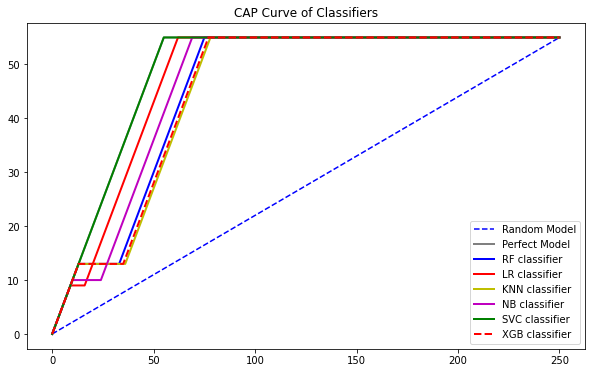

In [172]:
x = np.arange(0, total + 1) 
y_rf = np.append([0], np.cumsum(lm_rf)) 
y_lr = np.append([0], np.cumsum(lm_lr)) 
y_knn = np.append([0], np.cumsum(lm_knn)) 
y_nb = np.append([0], np.cumsum(lm_nb)) 
y_svc = np.append([0], np.cumsum(lm_svc)) 
y_xgb = np.append([0], np.cumsum(lm_xgb)) 

plt.figure(figsize = (10, 6)) 
plt.plot([0, total], [0, one_count], c = 'b', linestyle = '--', label = 'Random Model')
plt.plot([0, one_count, total], [0, one_count, one_count], c = 'grey', linewidth = 2, label = 'Perfect Model')
plt.title('CAP Curve of Classifiers')
plt.plot(x, y_rf, c = 'b', label = 'RF classifier', linewidth = 2)
plt.plot(x, y_lr, c = 'r', label = 'LR classifier', linewidth = 2)
plt.plot(x, y_knn, c = 'y', label = 'KNN classifier', linewidth = 2)
plt.plot(x, y_nb, c = 'm', label = 'NB classifier', linewidth = 2)
plt.plot(x, y_svc, c = 'g', label = 'SVC classifier', linewidth = 2)
plt.plot(x, y_xgb, c = 'r',linestyle = '--', label = 'XGB classifier', linewidth = 2)
plt.legend()


In [173]:
print("RF: ",acc_rf,"> Log Reg: ",acc_lr,"> KNN: ",acc_knn,"> NB: ",acc_nb,"> SVC: ",acc_svc, "> XGB: ",acc_xgb )

RF:  0.752 > Log Reg:  0.788 > KNN:  0.74 > NB:  0.764 > SVC:  0.78 > XGB:  0.744
